# Mesures MIMO synthétiques

In [1]:
from pylayers.measures.vna.E5072A import *
from pylayers.measures.exploith5 import *
from matplotlib import cm
from numpy.fft import * 
from pylayers.antprop.aarray import *
%matplotlib inline

Classe de lecture des fichiers h5

In [2]:
M=Mesh5()

Lste les fichiers disponibles dans le répertoire de mesures du projet

In [3]:
M.dir()

measDec.h5
mesMIMO.h5
MIMO_8_4_14janv_V2.h5
mes_8_4_15janv.h5
calMIMO_4_8.h5
calMIMO.h5
mesMIMO_4_8.h5
mimocal8_4_V1.h5
mimocal.h5
mes_4_8.h5


Lecture d'un fichier MIMO dans la classe Mchannel destinée à accueillir des canaux mesurés

In [7]:
M = Mesh5('mesMIMO.h5')

In [8]:
M.read(1,ix=[0,0,0,0])

In [9]:
type(M.mes)

pylayers.antprop.channel.Mchannel

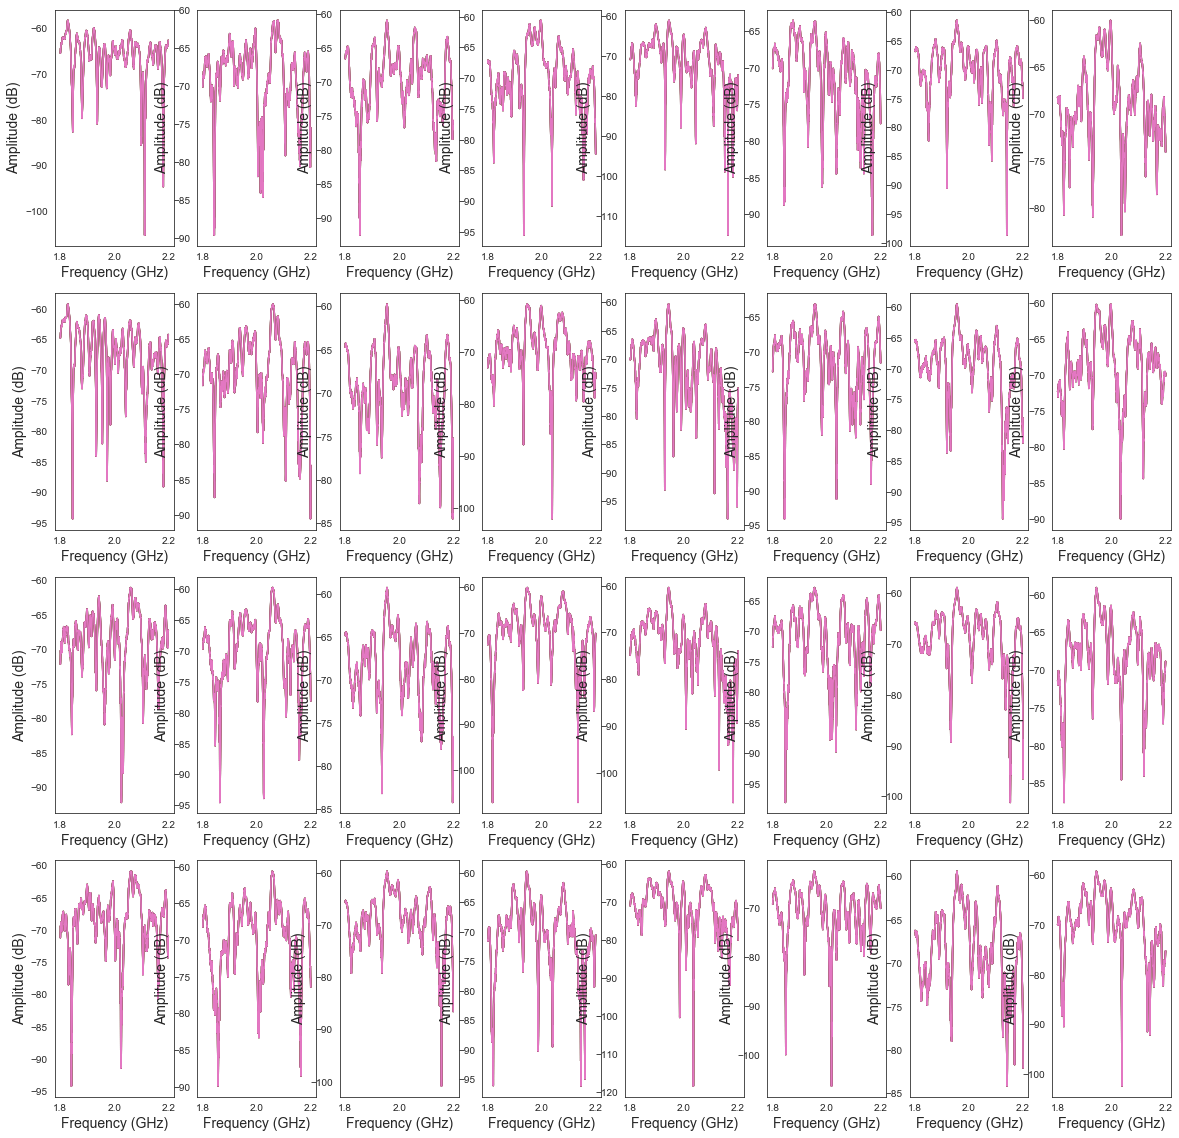

In [12]:
f=M.mes.plot(figsize=(20,20))

The second measurement run has been done on 18 January. It corresponds to a displacement along the 'x' axis with 10 measurement different location. The MIMO configuration was 4x8. The transmitting antenna center was 
[1.6,5.2,1.6] and the orientation along the x axis. 
The calibration set was 3, corresponding to  1000Hz for IF and Np = 801.

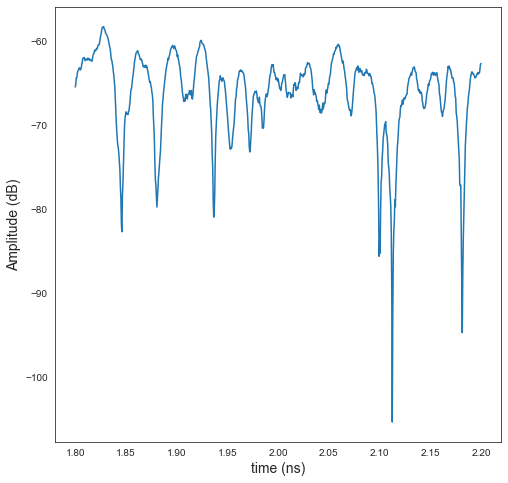

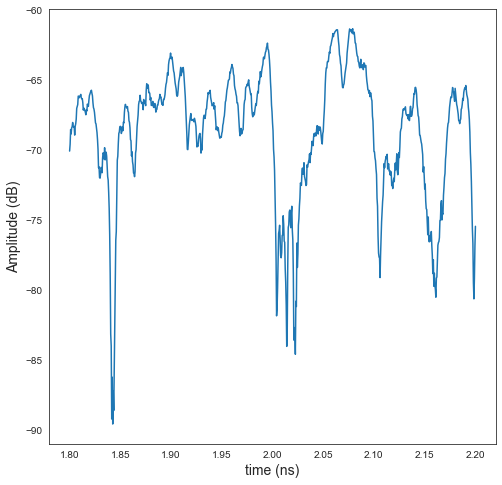

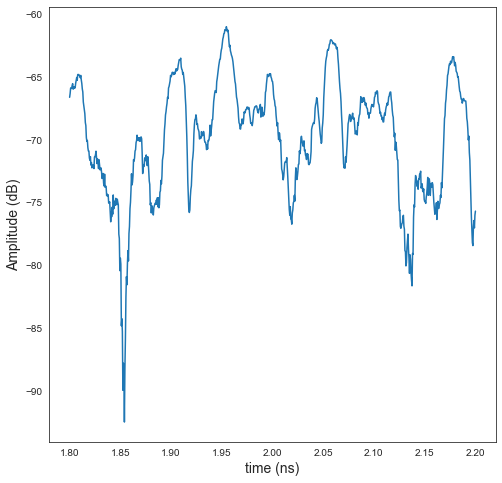

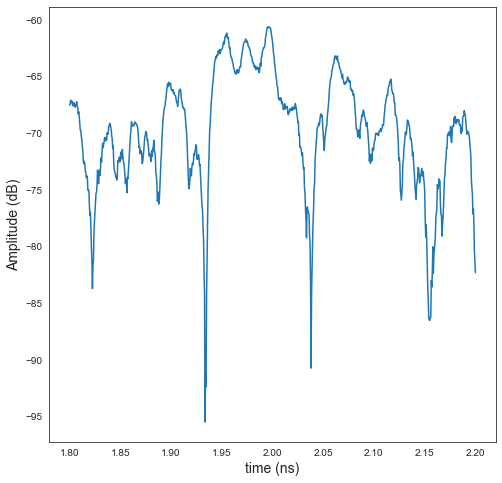

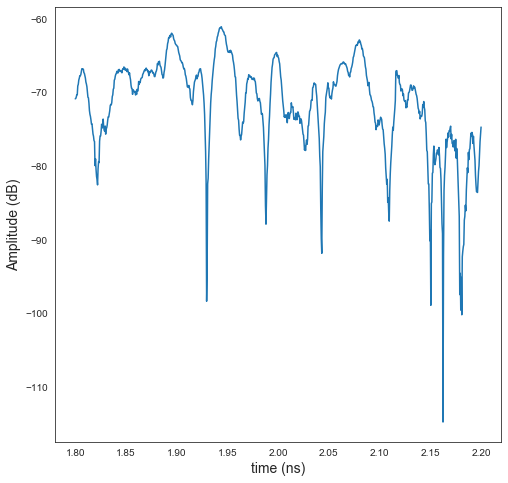

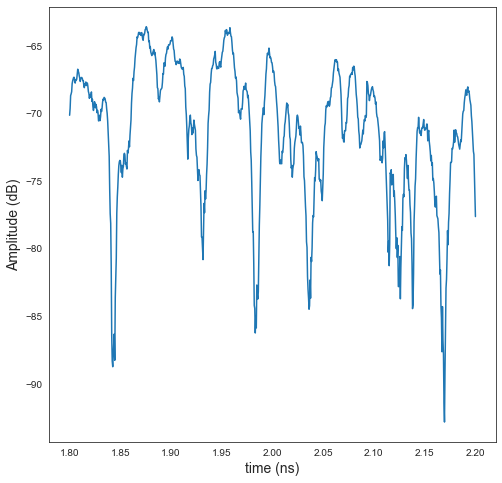

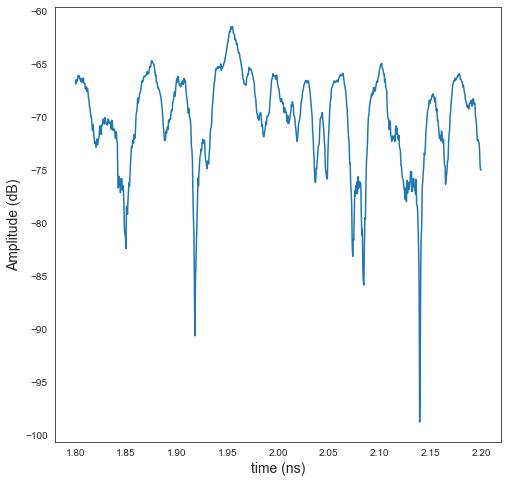

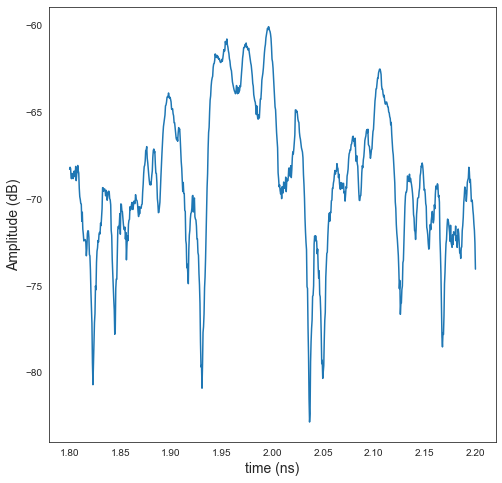

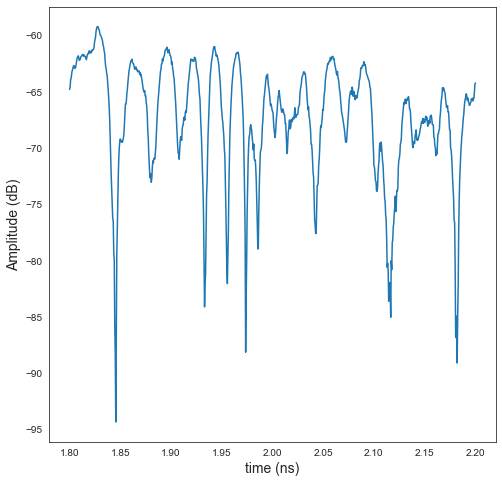

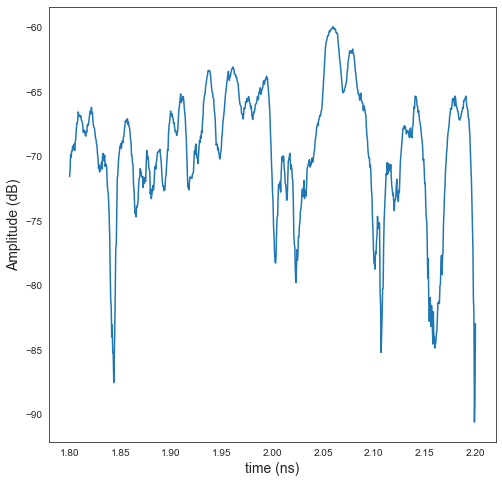

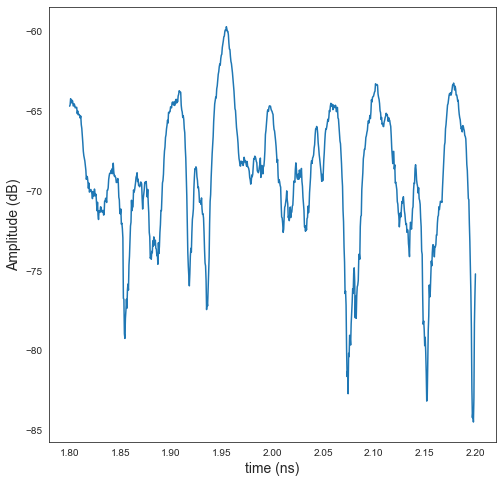

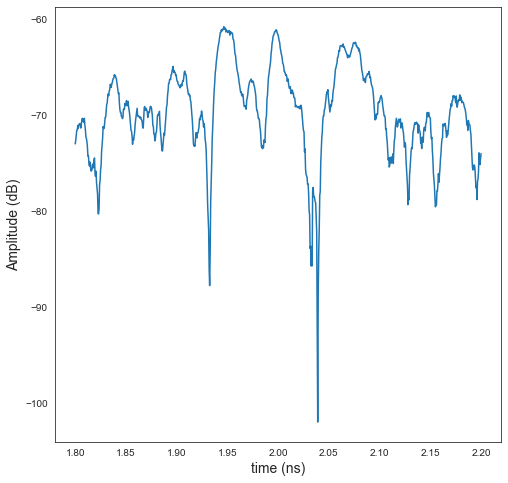

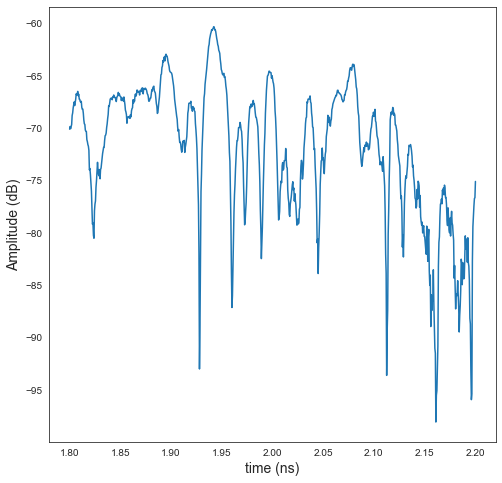

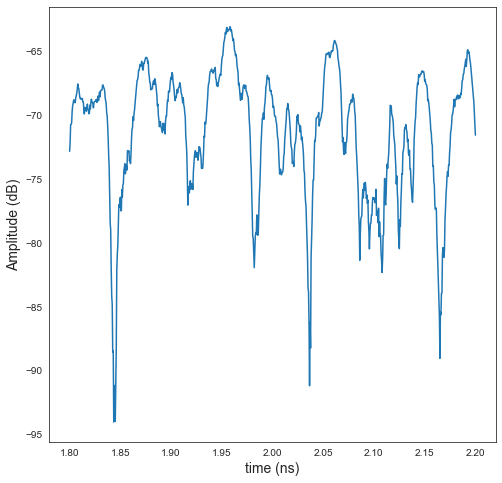

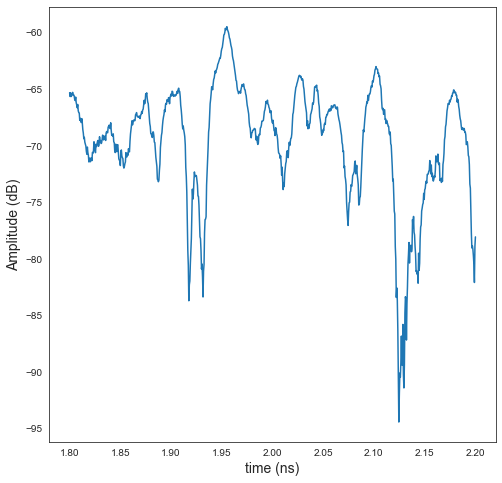

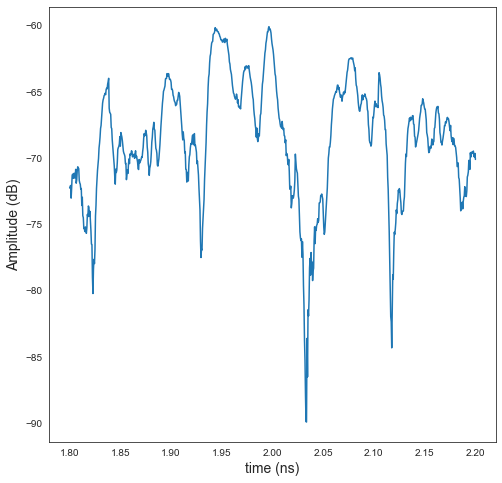

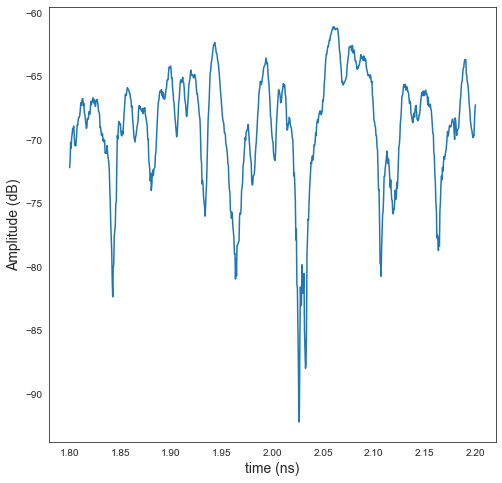

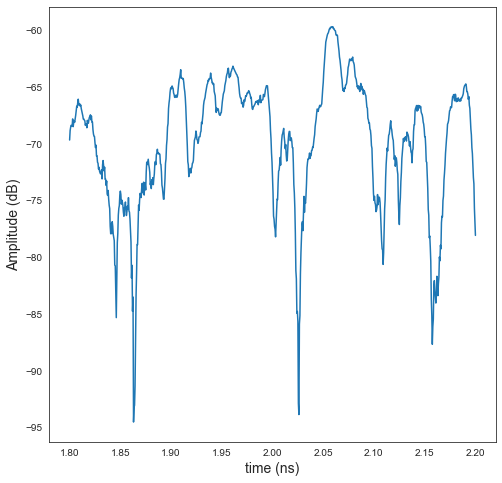

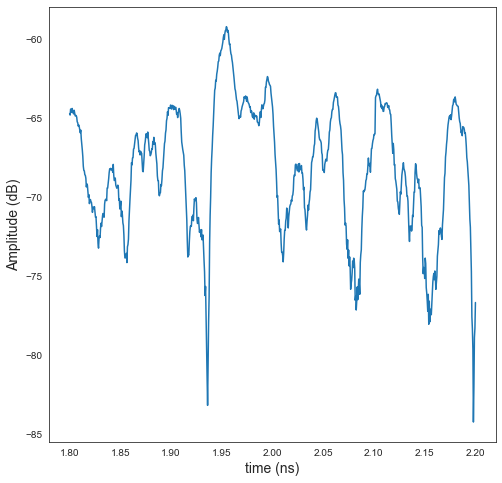

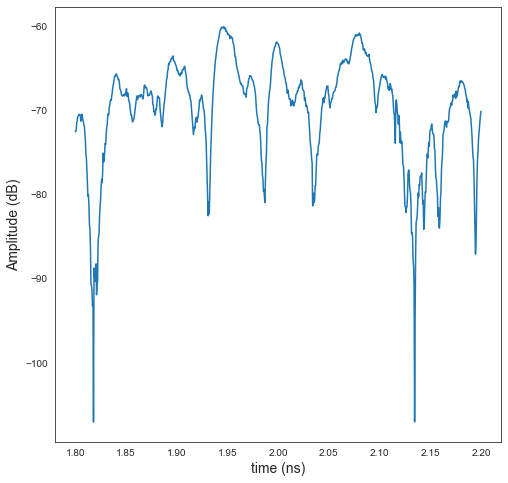

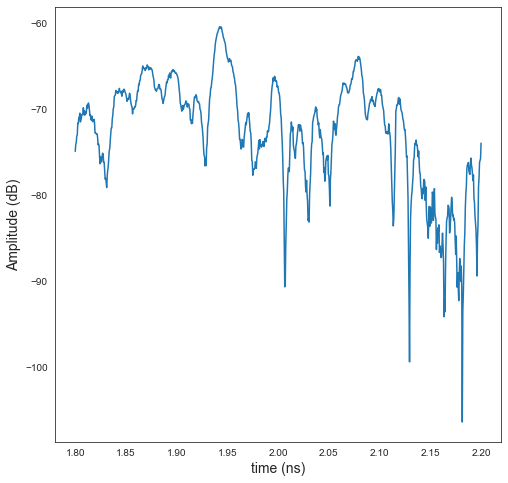

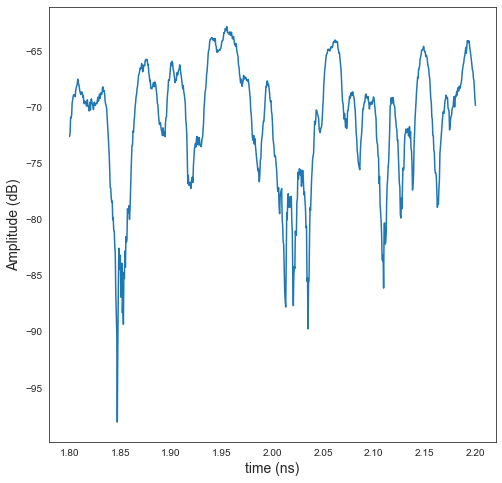

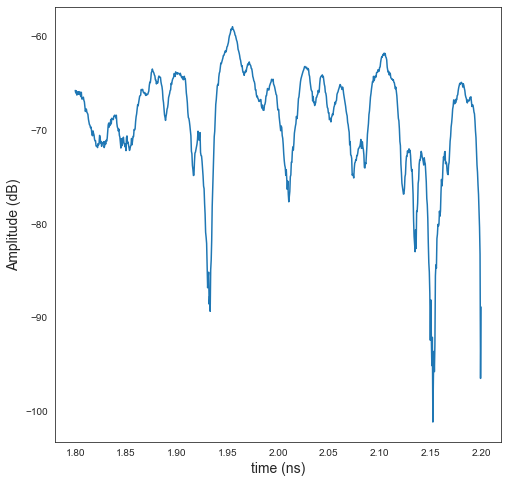

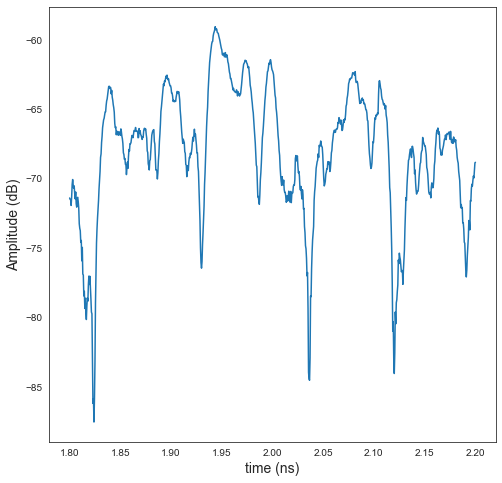

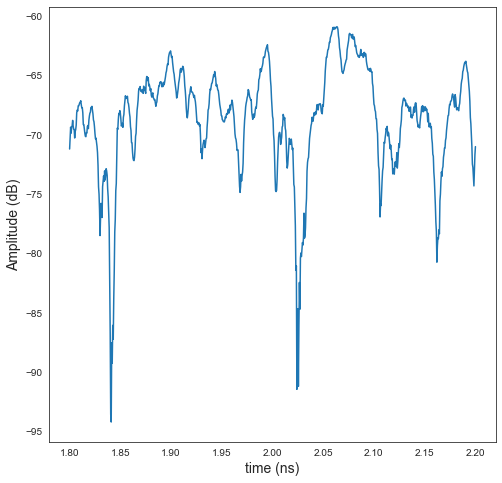

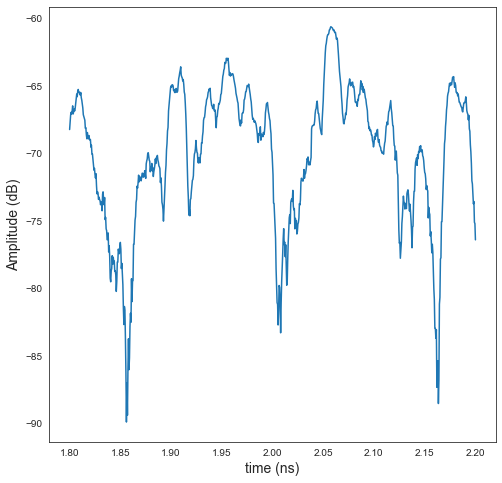

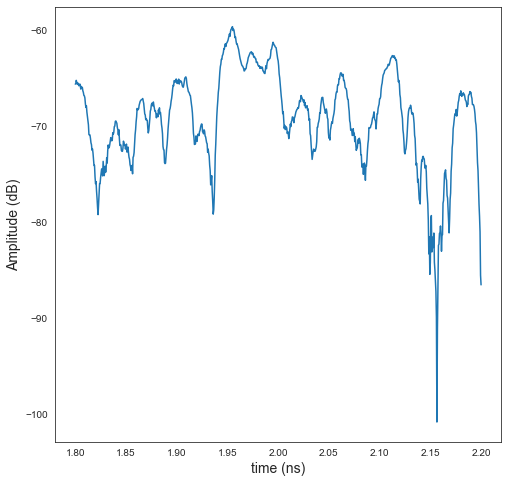

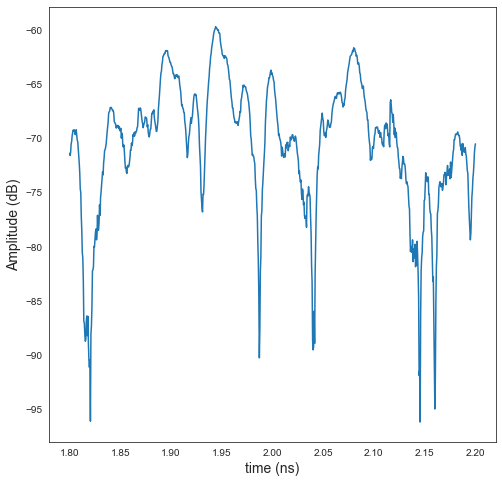

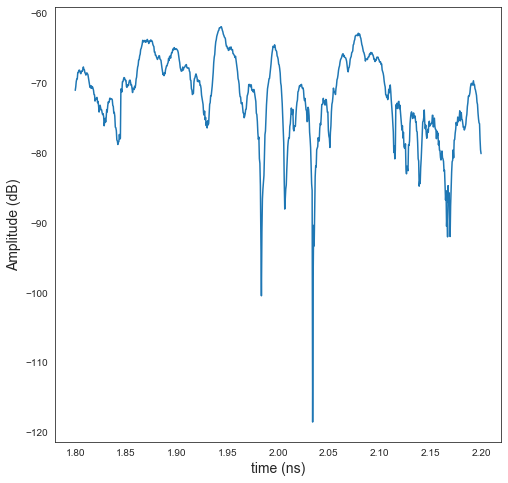

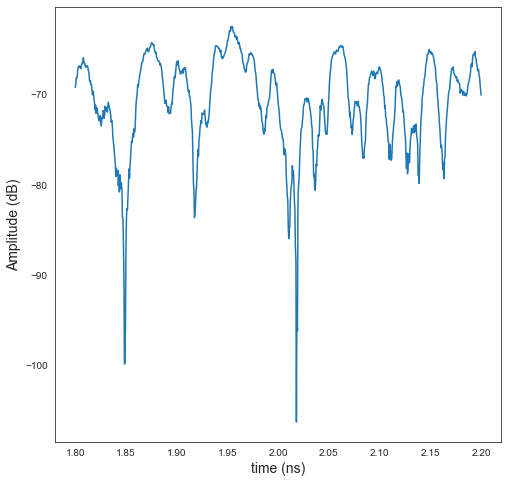

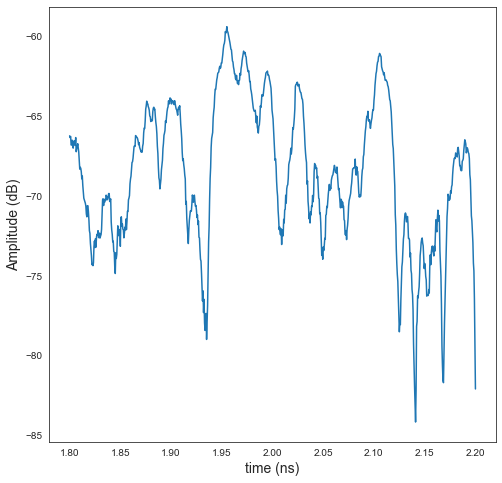

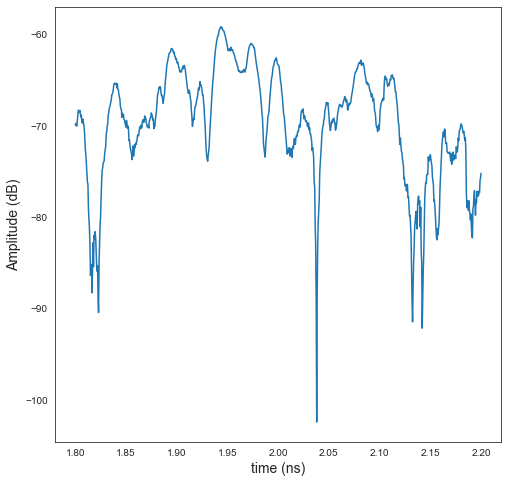

In [14]:
for r in range(4):
    for t in range(8):
        M.read(1,ix=[0, 0, 0, 0],calibrate=True)
        C11=Tchannel()
        C11.y  = M.mes.y[0,r,t,:]
        C11.x  = M.mes.x
        C11.plot(typ=['l20'])

In [15]:
M

-------------------------------------
              Parameters             
-------------------------------------
Directory  : /home/uguen/Bureau/P1/meas/mesMIMO.h5
-------------------------------------
Index : [0, 0, 0, 0]
Position : [0.35 0.   0.  ]

 Measurement calibrated : Yes
cal1

		1	b'calMIMO'	b'mamadou'	[b'CN27' b'sw1-8' b'CN5' b'CN6' b'CN7' b'CN8' b'CN9' b'CN10' b'CN11'
 b'CN12' b'CN29' b'RF-OPT' b'OPT-RF' b'CN3' b'sw1-4' b'CN15' b'CN28'
 b'CN30' b'CN31']	b'calibration for indoor measurement campaign : using a stranded           cable of 50m and optical transposition'	2.2	1.8	b'1'	1000	16	801	10	4	8	b'S21'	0	b'Wed Mar 30 21:34:42 2016'	

		2	b'calMIMO'	b'mamadou'	[b'CN27' b'sw1-8' b'CN5' b'CN6' b'CN7' b'CN8' b'CN9' b'CN10' b'CN11'
 b'CN12' b'CN29' b'RF-OPT' b'OPT-RF' b'CN3' b'sw1-4' b'CN15' b'CN28'
 b'CN30' b'CN31']	b'calibration for indoor measurement campaign : using a stranded           cable of 50m and optical transposition'	2.2	1.8	b'1'	1000	16	801	10	4	8	b'S21'	17	b'We

In [32]:
M.read(6,ix=[0, 0, 0, 0])

C22    = Tchannel()
C22.y  = M.mes.y[0,1,1,:]
C22.x  = M.mes.x

In [16]:
#C22.plot(typ=['l20'])

(<Figure size 576x576 with 1 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f56208bcc18>]],
       dtype=object))

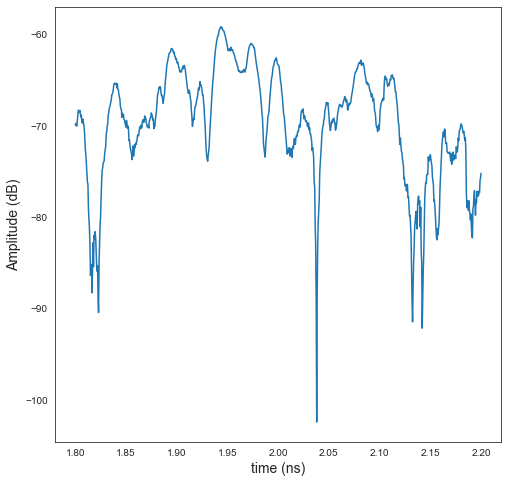

In [17]:

C11.plot(typ=['l20'])

In [18]:
c11=C11.ift(ffts=1)

(0, 150)

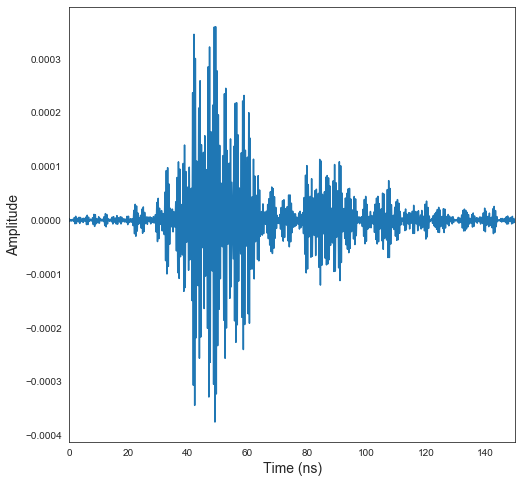

In [20]:
c11.plot(typ=['v'])
plt.xlim(0,150)
#plt.ylim(-160,-40)

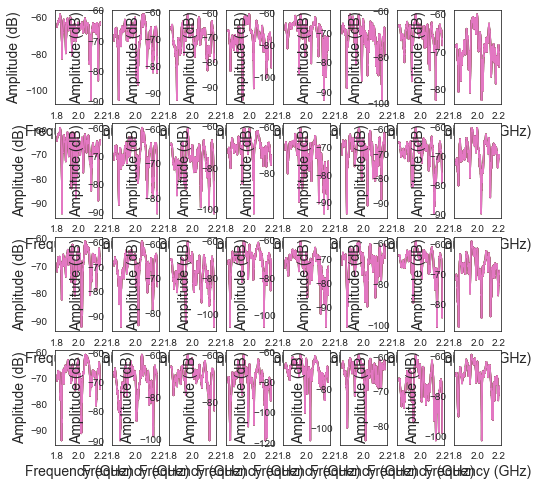

In [21]:
f,a=M.mes.plot()

In [23]:
#del TD
for  k in range(1):
    M.read(6,ix=[k,0,0,0,0])
    try:
        TD = np.concatenate((TD,M.mes.y),axis=0)
    except:
        TD = M.mes.y

In [24]:
C11=Tchannel()
C11.y  = TD[:,2,2,:]
C11.x  = M.mes.x

In [25]:
TD.shape

(1, 4, 8, 801)

In [26]:
C11.y.shape

(1, 801)

<Figure size 1440x720 with 0 Axes>

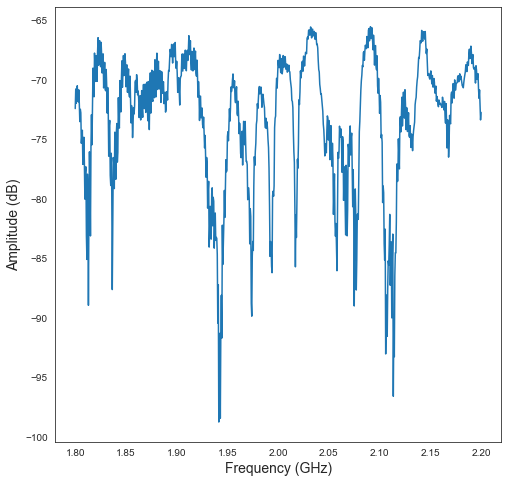

In [27]:
fig=plt.figure(figsize=(20,10))
U=C11.plot(iy=-1,figsize=(20,20))

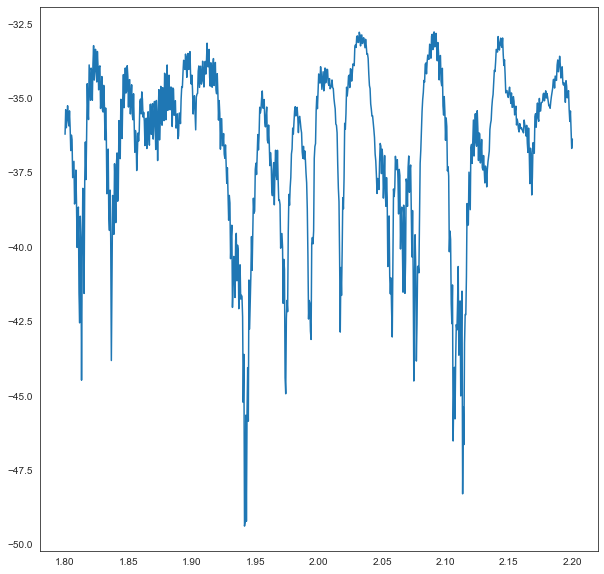

In [28]:
plt.figure(figsize=(10,10))
for t in range(1):
    u = 10*np.log10(np.abs(C11.y[t,:]))
    plt.plot(M.mes.x,u)

In [29]:
type(M.mes)

pylayers.antprop.channel.Mchannel

In [30]:
TD.shape

(1, 4, 8, 801)

In [31]:
fGHz = M.mes.x

In [32]:
df=fGHz[1]-fGHz[0]

In [33]:
t = np.linspace(-1/(2*df),1/(2*df),len(fGHz))

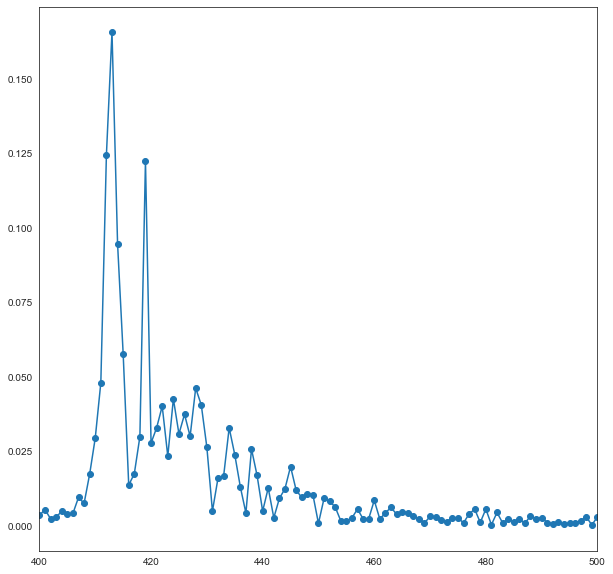

In [34]:
plt.figure(figsize=(10,10))
U=fftshift(fft(np.conj(TD[:,3,7,:]),axis=1))
for k in range(1):
    plt.plot(np.abs(U[k,:]),'o-')
    plt.xlim(400,500)

In [91]:
TD.shape

(10, 4, 8, 801)

In [97]:
plt.subplot?

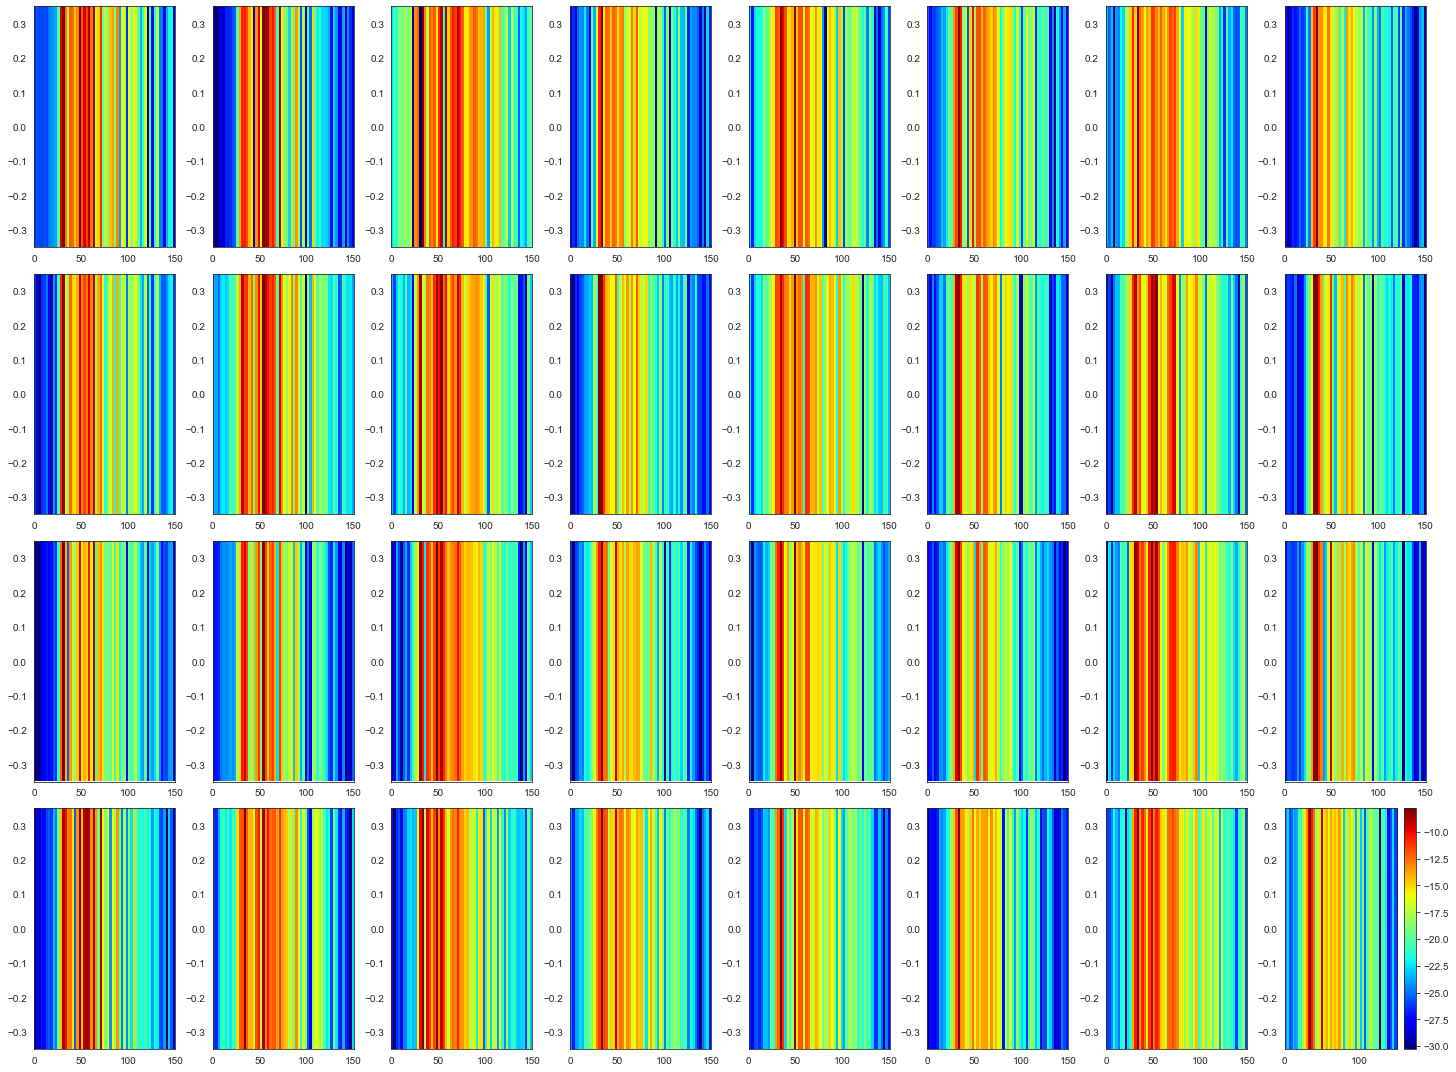

In [35]:
imin=400
imax=460
k = 0 
plt.figure(figsize=(20,15))
for ir in range(4):
    for it in range(8):
        k = k+1
        U=fftshift(fft(np.conj(TD[:,ir,it,:]),axis=1))
        #
        plt.subplot(4,8,k)
        plt.imshow(10*np.log10(np.abs(U[:,imin:imax])),interpolation='nearest',extent=[t[imin],t[imax],-0.35,0.35],cmap=cm.jet)
        plt.axis('auto')
plt.tight_layout()
plt.colorbar()

(300, 500)

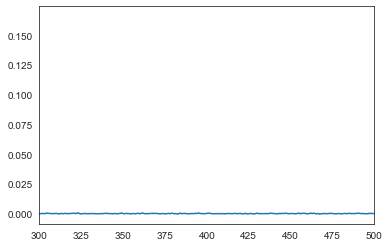

In [36]:
plt.plot(fftshift(np.abs(U[0,:])))
plt.xlim(300,500)

In [22]:
plt.imshow(np.abs(fftshift(U,axis=1))[350:450,:])

TypeError: fftshift() got an unexpected keyword argument 'axis'

In [ ]:
M.plot(cmd='ir')

In [114]:
from  pylayers.antprop.aarray import  *
A1 = AntArray(N=[100,1,1,1],min=[-0.035,0,0,0],max=[0.035,0,0,0])

In [115]:
A1

Antenna Array : 
Arrayof Gauss
N : [100   1   1   1]
dm : [ 0.00070707  0.          0.          0.        ]
Antenna type : Array
------------------------
 Sc : []
fmin : 2.40GHz
fmax : 2.40GHz
step : None
Nf : 1
-----------------------
      evaluated        
-----------------------
Ntheta : 90
Nphi : 181
   f = 2.40 GHz 
   theta = 88.99 (degrees) 
   phi = 0.00  (degrees) 

In [117]:
A1.p.shape

(3, 100)

In [120]:
A1 = AntArray(N=[100,1,1,1],max=[0.035,0,0,0],min=[-0.035,0,0,0],mode='grid')


In [122]:
A1.p

array([[-0.035     , -0.03429293, -0.03358586, -0.03287879, -0.03217172,
        -0.03146465, -0.03075758, -0.03005051, -0.02934343, -0.02863636,
        -0.02792929, -0.02722222, -0.02651515, -0.02580808, -0.02510101,
        -0.02439394, -0.02368687, -0.0229798 , -0.02227273, -0.02156566,
        -0.02085859, -0.02015152, -0.01944444, -0.01873737, -0.0180303 ,
        -0.01732323, -0.01661616, -0.01590909, -0.01520202, -0.01449495,
        -0.01378788, -0.01308081, -0.01237374, -0.01166667, -0.0109596 ,
        -0.01025253, -0.00954545, -0.00883838, -0.00813131, -0.00742424,
        -0.00671717, -0.0060101 , -0.00530303, -0.00459596, -0.00388889,
        -0.00318182, -0.00247475, -0.00176768, -0.00106061, -0.00035354,
         0.00035354,  0.00106061,  0.00176768,  0.00247475,  0.00318182,
         0.00388889,  0.00459596,  0.00530303,  0.0060101 ,  0.00671717,
         0.00742424,  0.00813131,  0.00883838,  0.00954545,  0.01025253,
         0.0109596 ,  0.01166667,  0.01237374,  0.0

In [12]:
A1 = AntArray(N=[1000,1,1,1],max=[0.35,0,0,0],min=[-0.35,0,0,0],mode='grid')

In [15]:
A1.p.shape

(3, 1000)

In [36]:
from numpy.linalg import svd
def sing_values():
    ir = 4
    it = 8
    npos = 5
    cpt = 0
    ipos = 6

    M = Mesh5('mesMIMO.h5')
    for  k in range(npos):
        M.read(ipos,ix=[k,0,0,0,0])
        try:
            TD = np.concatenate((TD,M.mes.y),axis=0)
        except:
            TD = M.mes.y
    fGHz = M.mes.x
    #M.read(2,ix=[99, 0, 0, 0])
    # TD.shape : (100, 4, 8, 801)
    TDm = np.sum(np.abs(TD),axis=0)/npos # mean of TD ; TDm.shape : (4, 8, 801)
    TDc = np.abs(TD)-TDm[None,...] # TD centered      ; TDc.shape : (85, 4, 8, 801)
    TDc2 = np.abs(TDc)**2 # square of TD centered     ; TDc2.shape : (85, 4, 8, 801)
    varTD = np.sum(TDc2,axis=0)/npos #variance of TD  ; varTD.shape : (4, 8, 801)

    # Friis formula with gain antenna around 12dB
    FS = -(32.4+20*np.log10(fGHz)+20*np.log10(5.435))+12

    #Singular values of the channel matrix
    TDs = np.swapaxes(TD,1,3)
    TDss = np.swapaxes(TDs,2,3)
    U,S,V= svd(TDss)
    
    #M.read(2,ix=[1, 0, 0, 0])

    for  k in range(npos):
        M.read(ipos,ix=[k,0,0,0,0])
        try:
            TD = np.concatenate((TD,M.mes.y),axis=0)
        except:
            TD = M.mes.y
    fGHz = M.mes.x

    sns.set_style("darkgrid")
    plt.ion()
    mu0  = np.mean(S[:npos,:,0],axis=0)
    mu1  = np.mean(S[:npos,:,1],axis=0)
    mu2  = np.mean(S[:npos,:,2],axis=0)
    mu3  = np.mean(S[:npos,:,3],axis=0)
    s0 = np.sqrt(np.mean((S[:npos,:,0]-mu0[None,:])**2,axis=0))
    s1 = np.sqrt(np.mean((S[:npos,:,1]-mu1[None,:])**2,axis=0))
    s2 = np.sqrt(np.mean((S[:npos,:,2]-mu2[None,:])**2,axis=0))
    s3 = np.sqrt(np.mean((S[:npos,:,3]-mu3[None,:])**2,axis=0))
    for k in range(npos):
        #First singular value
        plt.semilogy(fGHz,S[k,:,0],color='k',linewidth=.1)
        plt.semilogy(fGHz,mu0+1.96*s0,color='k',linewidth=1)
        plt.semilogy(fGHz,mu0-1.96*s0,color='k',linewidth=1)
        plt.semilogy(fGHz,mu0,color='k',marker='o',markevery=10,ms=3)

        #Second singular value
        plt.semilogy(fGHz,S[k,:,1],color='g',linewidth=.1)
        plt.semilogy(fGHz,mu1+1.96*s1,color='g',linewidth=1)
        plt.semilogy(fGHz,mu1-1.96*s1,color='g',linewidth=1)
        plt.semilogy(fGHz,mu1,color='k',marker='4',markevery=10,ms=3)

        #Third singular value
        plt.semilogy(fGHz,S[k,:,2],color='#ff4500',linewidth=.1)
        plt.semilogy(fGHz,mu2+1.96*s2,color='#ff4500',linewidth=1)
        plt.semilogy(fGHz,mu2-1.96*s2,color='#ff4500',linewidth=1)
        plt.semilogy(fGHz,mu2,color='k',marker='3',markevery=10,ms=3)

        #Fourth singular value
        plt.semilogy(fGHz,S[k,:,3],color='b',linewidth=.1)
        plt.semilogy(fGHz,mu3+1.96*s3,color='b',linewidth=1)
        plt.semilogy(fGHz,mu3-1.96*s3,color='b',linewidth=1)
        plt.semilogy(fGHz,mu3,color='k',marker='s',markevery=10,ms=3)

    plt.title(r'Evolution of singular values of the matrix $\mathbf{H}_{ij}(f)$ along a $\Delta_x=0.7m$',fontsize=14)
    plt.ylabel('Module (linear scale $\in [0,1]$)',fontsize=14)
    plt.xlabel('Frequency (GHz)',fontsize=14)
    plt.xlim(1.8,2.2)
    plt.legend(loc='best')
    plt.tight_layout()
    #plt.savefig('fig4.png')


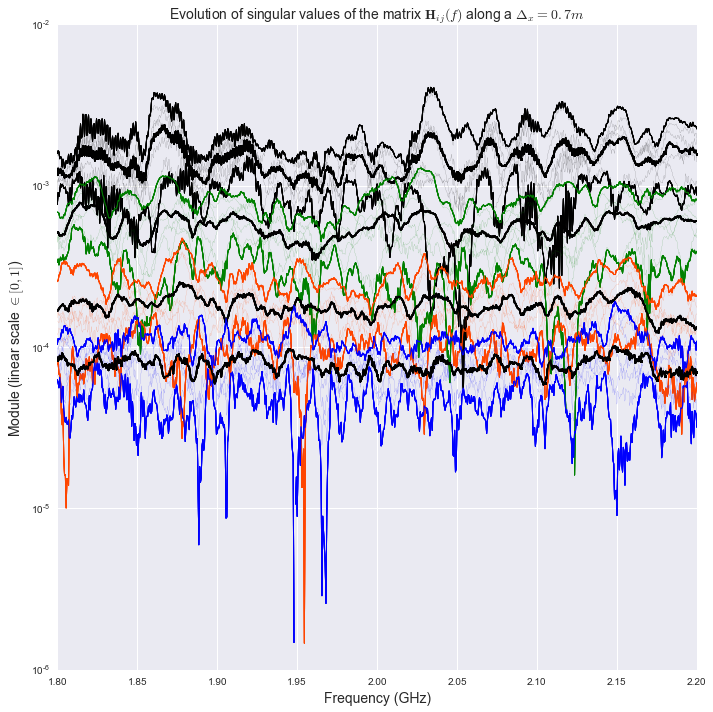

In [37]:
%matplotlib inline
plt.figure(figsize=(10,10))
sing_values()